<a href="https://colab.research.google.com/github/premdub/Intro-to-R-/blob/main/intro_to_R_Chapter_1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
 install.packages('IRkernel') 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [96]:
IRkernel::installspec()

In [97]:
library(tidyverse)

In [98]:
x <- 12

In [99]:
# create vector of integers from 0 to 9
some_numbers <- c(0,1,2,3,4,5,6,7,8,9)

# alternatively 
some_numbers <- c(0:9)

In [100]:
some_numbers

[1] 0 1 2 3 4 5 6 7 8 9

In [101]:
mean(some_numbers)

[1] 4.5

In [102]:
library(tidyverse)

In [103]:
paygap <- read.csv('/content/data/paygap.csv', header = TRUE)

In [104]:
head(paygap, n = 5)

,EmployerName,EmployerId,Address,PostCode,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,⋯,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>
1,A.J.N. STEELSTOCK LTD.,14835,"Icknield Way, Kentford, Newmarket, Suffolk, CB8 7QT",CB8 7QT,689647,46720,16.2,3.3,-20.0,0.0,⋯,10.8,87.1,12.9,https://www.ajnsteelstock.co.uk/wp-content/uploads/2022/10/2022-Gender-Pay-Gap-Report.pdf,Courtney Bell (FD),250 to 499,A.J.N. STEELSTOCK LTD.,FALSE,4/5/2023 0:00,10/11/2022 15:34
2,AB WORLD FOODS LIMITED,764,"Weston Centre, 10 Grosvenor Street, London, W1K 4QY",W1K 4QY,1400901,10890,-8.6,-12.3,10.3,-20.8,⋯,33.7,44.6,55.4,https://abworldfoods.com/documents/ABWF_Gender_Pay_Gap_Narrative_2022.pdf,Andy Mayhew (Managing Director),250 to 499,AB WORLD FOODS LIMITED,FALSE,4/5/2023 0:00,9/30/2022 9:45
3,ABACUS EMPLOYMENT SERVICES LIMITED,767,"1 Chequers Road, Basingstoke, Hampshire, England, RG21 7PU",RG21 7PU,2638307,78200,-3.0,3.2,NA,NA,⋯,21.5,80.9,19.1,http://www.abacus-employment.com,Phil James (Finance Manager),250 to 499,ABACUS EMPLOYMENT SERVICES LIMITED,FALSE,4/5/2023 0:00,4/13/2022 14:57
4,"Advisory, Conciliation and Arbitration Service",496,"8th Floor, Windsor House, 50 Victoria Street, London, London, United Kingdom, SW1H 0TL",SW1H 0TL,,"1, 84110",7.2,6.1,19.4,9.9,⋯,63.2,51.8,48.2,https://www.acas.org.uk/acas-gender-pay-report/2021-to-2022-report,,1000 to 4999,"Advisory, Conciliation and Arbitration Service",FALSE,3/31/2023 0:00,8/1/2022 13:15
5,AFH INDEPENDENT FINANCIAL SERVICES LIMITED,19364,"Afh House Buntsford Drive, Stoke Heath, Bromsgrove, Worcestershire, B60 4JE",B60 4JE,4049180,64999,25.0,32.0,-33.0,69.0,⋯,59.0,60.0,40.0,,Alison Court (Senior HR Adviser),500 to 999,AFH INDEPENDENT FINANCIAL SERVICES LIMITED,FALSE,4/5/2023 0:00,5/20/2022 11:24


In [105]:
colnames(paygap)

[1] "EmployerName"              "EmployerId"               
 [3] "Address"                   "PostCode"                 
 [5] "CompanyNumber"             "SicCodes"                 
 [7] "DiffMeanHourlyPercent"     "DiffMedianHourlyPercent"  
 [9] "DiffMeanBonusPercent"      "DiffMedianBonusPercent"   
[11] "MaleBonusPercent"          "FemaleBonusPercent"       
[13] "MaleLowerQuartile"         "FemaleLowerQuartile"      
[15] "MaleLowerMiddleQuartile"   "FemaleLowerMiddleQuartile"
[17] "MaleUpperMiddleQuartile"   "FemaleUpperMiddleQuartile"
[19] "MaleTopQuartile"           "FemaleTopQuartile"        
[21] "CompanyLinkToGPGInfo"      "ResponsiblePerson"        
[23] "EmployerSize"              "CurrentName"              
[25] "SubmittedAfterTheDeadline" "DueDate"                  
[27] "DateSubmitted"

In [106]:
dim(paygap)

[1] 350  27

In [107]:
class(paygap)

[1] "data.frame"

In [108]:
class(paygap$DiffMeanHourlyPercent)

[1] "numeric"

In [109]:
cardiacdata <- read.csv('/content/data/normtemp.csv', header = TRUE)

In [110]:
# extract element in 1st row and 3th column
cardiacdata[1,3]

[1] 70

In [111]:
# extract rows 5-7 from columns 1-3
cardiacdata[5:7,1:3]

,bodytemp,sex,heartrate
,<dbl>,<chr>,<int>
5,36.2,male,73
6,36.2,male,75
7,36.2,male,82


In [112]:
# extract column 'bodytemp' and assign to new object 'temperatures'
temperatures <- cardiacdata$bodytemp

In [113]:
# select columns 'gender' and 'heartrate' and assign to new object 'heartrates'
heartrates <- select(cardiacdata, sex, heartrate)

In [114]:
## append variable names with their respective units
# rename 'bodytemp' to 'bodytemp_degF'
cardiacdata <- rename(cardiacdata, bodytemp_degF = bodytemp)

# rename 'heartrate' to 'heartrate_bpm'
cardiacdata <- rename(cardiacdata, heartrate_bpm = heartrate)

In [115]:
head(cardiacdata)

,bodytemp_degF,sex,heartrate_bpm
,<dbl>,<chr>,<int>
1,35.7,male,70
2,35.9,male,71
3,36.1,male,74
4,36.1,male,80
5,36.2,male,73
6,36.2,male,75


In [116]:
# add new column with body temperature in degrees celsius
cardiacdata <- mutate(cardiacdata, bodytemp_degC = (bodytemp_degF - 32)*(5/9))

In [117]:
# change values in gender column to read "Female" and "Male" instead of 1 and 2
cardiacdata <- mutate(cardiacdata, sex = ifelse(sex == 1, 'Female', 
                                            ifelse(sex == 2, 'Male', NA)))

In [118]:
head(cardiacdata)

,bodytemp_degF,sex,heartrate_bpm,bodytemp_degC
,<dbl>,<lgl>,<int>,<dbl>
1,35.7,NA,70,2.055556
2,35.9,NA,71,2.166667
3,36.1,NA,74,2.277778
4,36.1,NA,80,2.277778
5,36.2,NA,73,2.333333
6,36.2,NA,75,2.333333


In [119]:
# filter for data from female subjects only
cardiacdata_female <- filter(cardiacdata, sex == 'Female')

In [ ]:
f(x)
g(x)
h(x)

In [ ]:
x %>% f() %>% g() %>% h()

In [ ]:
cardiacdata <- cardiacdata %>%
  filter(sex == 'Female') %>%
  select(sex) %>%
  mutate(bodytemp_Kelvin = bodytemp_degC + 273)

In [124]:
cardiacdata_bysex <- cardiacdata %>%
  group_by(sex) %>%                                  # group by 'gender'
  summarize(avg_bodytemp_degF = mean(bodytemp_degF),    # aggregate using means
            avg_bodytemp_degC = mean(bodytemp_degC), 
            avg_heartrate_bpm = mean(heartrate_bpm))  

In [125]:
some_numbers <- c(4,5,6,7,NA,8)

mean(some_numbers)

[1] NA

In [126]:
mean(some_numbers, na.rm = TRUE)

[1] 6

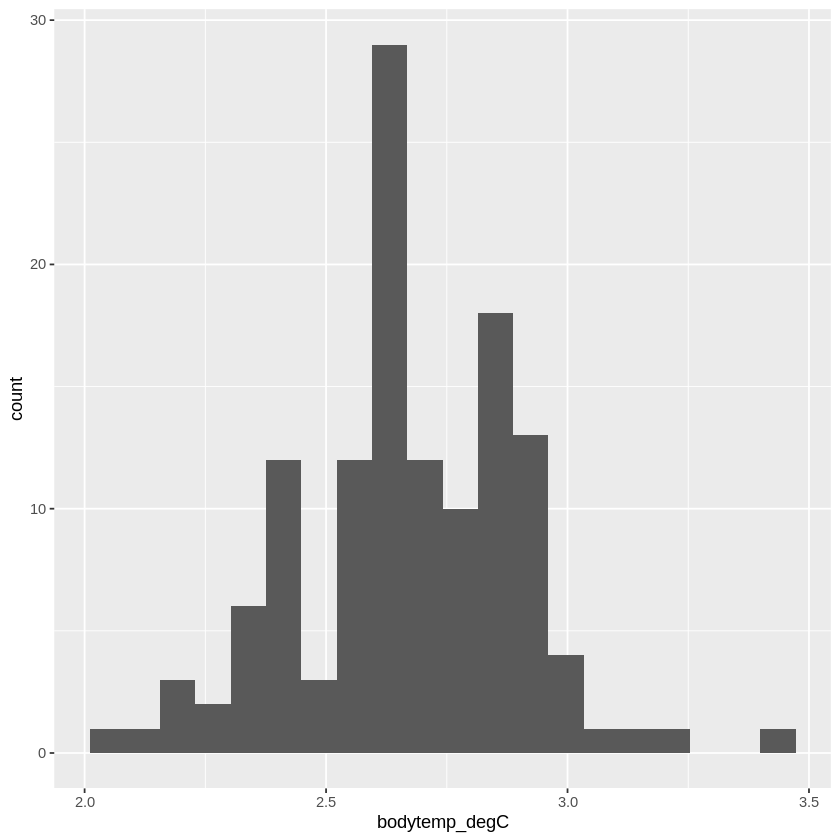

In [92]:
ggplot(data = cardiacdata, mapping = aes(x = bodytemp_degC)) + 
  geom_histogram(bins = 20)

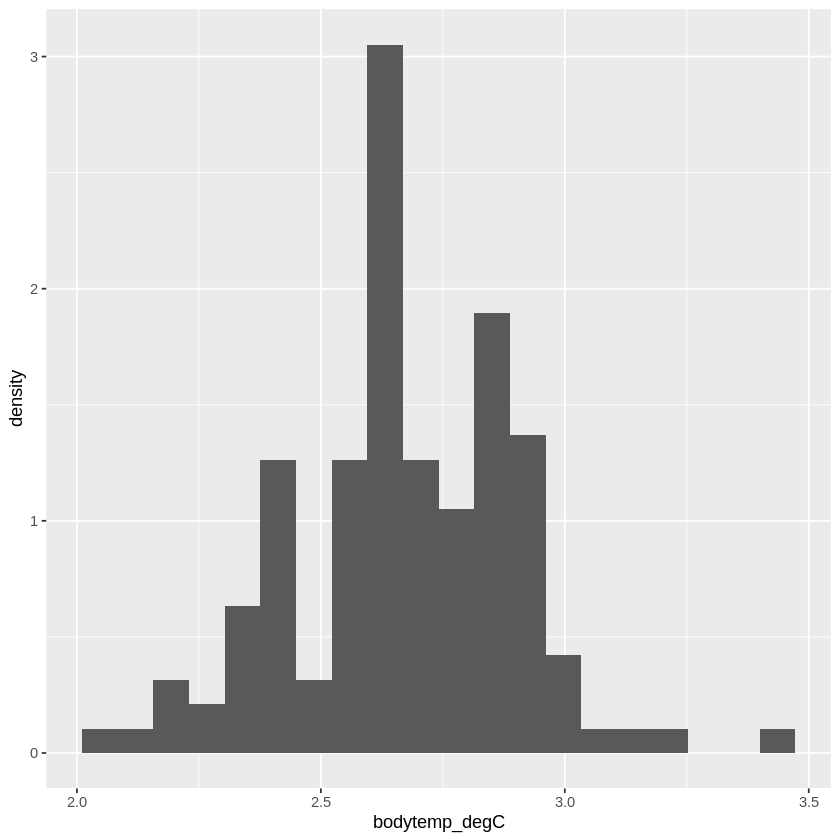

In [91]:
ggplot(data = cardiacdata, mapping = aes(x = bodytemp_degC)) + 
  geom_histogram(bins = 20, aes(y = ..density..))

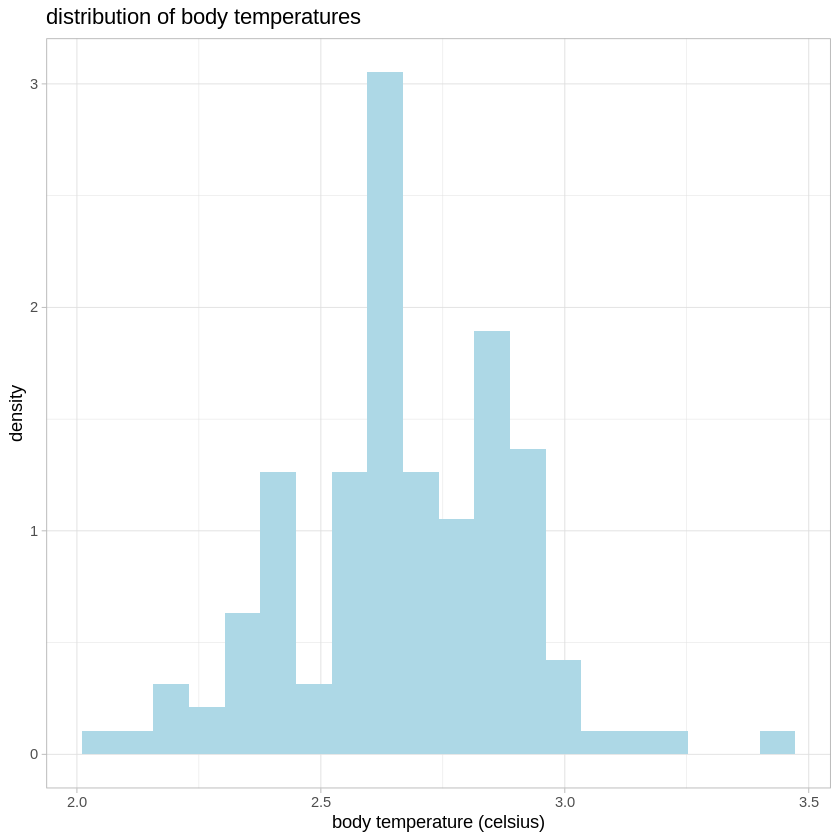

In [90]:
ggplot(data = cardiacdata, mapping = aes(x = bodytemp_degC)) + 
  geom_histogram(bins = 20, aes(y = ..density..), fill = 'lightblue') +
  xlab('body temperature (celsius)') +
  ggtitle('distribution of body temperatures') +
  theme_light()

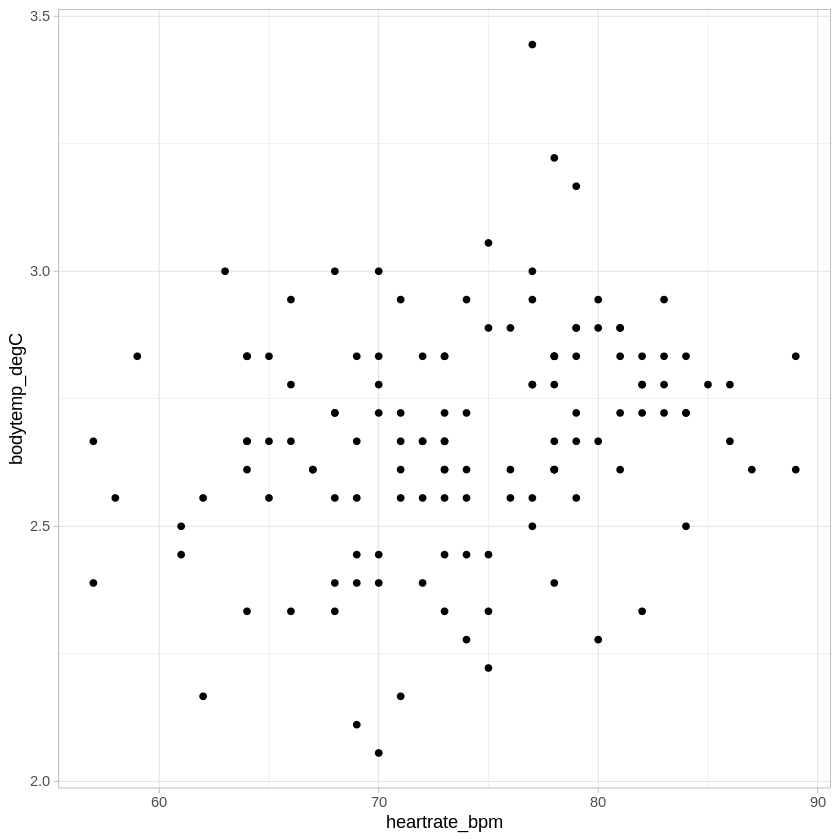

In [127]:
ggplot(data = cardiacdata, mapping = aes(x = heartrate_bpm, y = bodytemp_degC)) + 
  geom_point() +
  theme_light()

In [130]:
ggplot(data = cardiacdata, mapping = aes(x = heartrate_bpm, y = bodytemp_degC, color = sex)) + 
  geom_point() +
  theme_light()

ERROR while rich displaying an object: Error: Must request at least one colour from a hue palette.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output

In [128]:
ggplot(data = cardiacdata, mapping = aes(x = gender, y = bodytemp_degC)) +
  geom_boxplot() +
  xlab('gender') +
  ylab('body temperature (celsius)') +
  theme_light()

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'gender' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(